In [1]:
import pandas as pd
import seaborn as sns
import networkx as nx
import numpy as np
import re
import matplotlib.pyplot as plt
import itertools
import sklearn.datasets
from sklearn.metrics.pairwise import euclidean_distances
import math
import random

In [2]:
def generateRandomGraph(num_nodes, num_edges):
    # Generate a random graph
    G = nx.gnm_random_graph(num_nodes, num_edges)

    # Ensure all nodes have at least degree 1
    for node in G.nodes:
        if G.degree[node] == 0:
            # Find a random node to connect with
            target = random.choice(list(G.nodes))
            while target == node or G.has_edge(node, target):
                target = random.choice(list(G.nodes))
            G.add_edge(node, target)
    return G

In [3]:
randomG = generateRandomGraph(10,15)
randomG.edges

EdgeView([(0, 5), (0, 8), (0, 1), (0, 2), (0, 7), (1, 6), (1, 4), (1, 8), (2, 5), (3, 4), (3, 5), (4, 9), (5, 6), (6, 7), (6, 9)])

In [4]:
(0,4) in randomG.edges

False

In [5]:
def generateProbabilityList(G : nx.Graph):
    probList = []
    for node in G.nodes:
        for _ in range(0, G.degree[node]):
            probList.append(node)
    return probList

# n wanted nodes, m edges for new n
def BAModel(G : nx.Graph, n, m):
    random.seed()
    while len(G.nodes) < n:
        probList = generateProbabilityList(G)
        currentNode = len(G.nodes)
        G.add_node(currentNode) # Add new node with index of len G.nodes
        for i in range(0,m):
            # Need to add check for same edges or multiple edges
            rIndex = random.randint(0,len(probList) - 1)
            while (currentNode, probList[rIndex]) in G.edges: # Generate new nodes to connect to till you find edge that doesnt exist yet
                rIndex = random.randint(0,len(probList) - 1)
            G.add_edge(currentNode, probList[rIndex])
    return G


In [6]:
BAGraph2 = randomG.copy()
BAGraph2 = BAModel(BAGraph2, 550, 2)

In [7]:
BAGraph2.edges

EdgeView([(0, 5), (0, 8), (0, 1), (0, 2), (0, 7), (0, 16), (0, 19), (0, 27), (0, 31), (0, 34), (0, 54), (0, 56), (0, 61), (0, 62), (0, 65), (0, 85), (0, 89), (0, 90), (0, 91), (0, 108), (0, 120), (0, 121), (0, 161), (0, 163), (0, 165), (0, 167), (0, 186), (0, 195), (0, 204), (0, 224), (0, 235), (0, 250), (0, 258), (0, 265), (0, 271), (0, 338), (0, 341), (0, 365), (0, 379), (0, 385), (0, 391), (0, 403), (0, 421), (0, 439), (0, 445), (0, 465), (0, 488), (0, 515), (0, 528), (0, 540), (0, 547), (1, 6), (1, 4), (1, 8), (1, 10), (1, 12), (1, 13), (1, 21), (1, 36), (1, 38), (1, 43), (1, 50), (1, 60), (1, 68), (1, 69), (1, 78), (1, 83), (1, 88), (1, 149), (1, 155), (1, 159), (1, 194), (1, 197), (1, 232), (1, 245), (1, 302), (1, 330), (1, 377), (1, 427), (1, 437), (1, 462), (1, 516), (1, 541), (1, 542), (1, 547), (2, 5), (3, 4), (3, 5), (3, 11), (3, 20), (3, 25), (3, 27), (3, 30), (3, 34), (3, 44), (3, 87), (3, 116), (3, 126), (3, 129), (3, 147), (3, 195), (3, 223), (3, 226), (3, 270), (3, 327)

In [8]:
generateProbabilityList(randomG)

[0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 2,
 2,
 3,
 3,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 7,
 7,
 8,
 8,
 9,
 9]

In [10]:
nx.spring_layout(BAGraph2)

{0: array([-0.23272277,  0.10964957]),
 1: array([0.13162446, 0.01609352]),
 2: array([-0.42288604,  0.11013891]),
 3: array([ 0.09952308, -0.18099074]),
 4: array([ 0.17695948, -0.07930066]),
 5: array([-0.16662098,  0.02938976]),
 6: array([ 0.05450729, -0.15659757]),
 7: array([0.10944781, 0.11973814]),
 8: array([-0.04191055,  0.34812897]),
 9: array([ 0.09352466, -0.37789521]),
 10: array([ 0.12879401, -0.18940362]),
 11: array([-0.02973185,  0.00052234]),
 12: array([-0.30017871, -0.11306778]),
 13: array([-0.10432235,  0.04979517]),
 14: array([0.3699376 , 0.11571589]),
 15: array([-0.00332806, -0.14004065]),
 16: array([-0.22431752,  0.27757895]),
 17: array([0.09779607, 0.14755976]),
 18: array([0.01461683, 0.35446587]),
 19: array([-0.17898968,  0.03013975]),
 20: array([-0.22237918,  0.00664385]),
 21: array([0.16491389, 0.1625044 ]),
 22: array([0.18328838, 0.08234976]),
 23: array([-0.19378619, -0.09892853]),
 24: array([-0.19897369,  0.20342447]),
 25: array([ 0.11806479,

In [11]:
def drawGraph(G):
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G, seed=42)  # positions for all nodes

    # Draw the nodes with community-based colors
    nx.draw_networkx_nodes(G, pos, cmap=plt.cm.rainbow, node_size=300)

    # Draw the edges
    nx.draw_networkx_edges(G, pos, alpha=0.5)

    # Add labels (optional)
    nx.draw_networkx_labels(G, pos)

    plt.title('Graph with Communities')
    plt.show()

e:\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


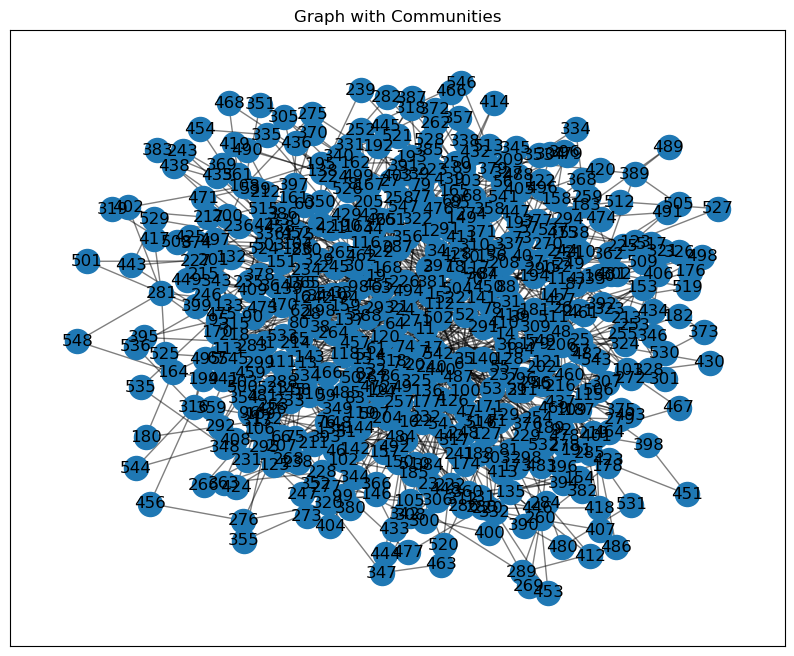

In [12]:
drawGraph(BAGraph2)

In [13]:
BAGraph3 = randomG.copy()
BAGraph3 = BAModel(BAGraph3, 550, 3)

In [14]:
def save_graph_as_table(list_of_graphs):
    """
    Create a table with various graph properties for each graph in the list.
    """
    values = []
    for (G,m) in list_of_graphs:
        # Number of nodes and edges
        num_nodes = G.number_of_nodes()
        num_edges = G.number_of_edges()
        
        # Average degree
        avg_degree = 2 * num_edges / num_nodes if num_nodes > 0 else 0
        
        # Density
        density = nx.density(G)
        
        # Connected components
        components = [len(c) for c in nx.connected_components(G)]
        num_components = len(components)
        largest_component_size = max(components) if components else 0
        
        # Diameter of the largest component (if applicable)
        if num_components > 1:
            largest_component = max(nx.connected_components(G), key=len)
            subgraph = G.subgraph(largest_component)
            diameter = nx.diameter(subgraph) if nx.is_connected(subgraph) else float('inf')
        else:
            diameter = nx.diameter(G) if nx.is_connected(G) else float('inf')
        
        # Average path length (computed per component)
        try:
            avg_path_length = nx.average_shortest_path_length(G)
        except nx.NetworkXError:
            avg_path_length = float('inf')
        
        # Clustering coefficient
        clustering_coefficient = nx.average_clustering(G)
        
        # Degree distribution (list of degrees of all nodes)
        degree_distribution = [d for _, d in G.degree()]
        
        # Community structure
        communities = list(nx.community.greedy_modularity_communities(G))
        modularity = nx.algorithms.community.modularity(G, communities)
        
        # Centralities
        degree_centrality = nx.degree_centrality(G)
        betweenness_centrality = nx.betweenness_centrality(G)
        
        # Adding all data to a dictionary for the table row
        values.append({
            "Vrcholy": num_nodes,
            "Hrany": num_edges,
            "M": m,
            "Průměrný stupeň": avg_degree,
            "Hustota": density,
            "Komponenty": num_components,
            "Velikosti komponentů": components,
            "Největší velikost komponentu": largest_component_size,
            "Průměr": diameter,
            "Průměrná délka cesty": avg_path_length,
            "Clustering Coefficient": clustering_coefficient,
            "Distribuce stupňů": degree_distribution,
            "Modularita": modularity,
            "Degree Centrality": degree_centrality,
            "Betweenness Centrality": betweenness_centrality
        })
    
    # Convert the list of dictionaries into a pandas DataFrame for tabular representation
    table = pd.DataFrame(values)
    display(table)
    
    table.to_csv("graph_metricsBA.csv", index=False)

In [15]:
save_graph_as_table([(BAGraph2,2), (BAGraph3,3)])

,Vrcholy,Hrany,M,Průměrný stupeň,Hustota,Komponenty,Velikosti komponentů,Největší velikost komponentu,Průměr,Průměrná délka cesty,Clustering Coefficient,Distribuce stupňů,Modularita,Degree Centrality,Betweenness Centrality
0,550,1095,2,3.981818,0.007253,1,[550],550,7,3.819341,0.039942,"[51, 35, 2, 27, 19, 54, 46, 16, 3, 10, 16, 22,...",0.506539,"{0: 0.09289617486338798, 1: 0.0637522768670309...","{0: 0.17259653652757753, 1: 0.1359000032117169..."
1,550,1635,3,5.945455,0.010830,1,[550],550,6,3.347952,0.030826,"[36, 35, 17, 49, 26, 37, 39, 20, 25, 20, 21, 3...",0.393041,"{0: 0.06557377049180328, 1: 0.0637522768670309...","{0: 0.07457173182186659, 1: 0.0835072476614478..."


In [19]:
df1 = pd.DataFrame()
df1 = nx.to_pandas_edgelist(BAGraph2)
df1.to_csv("BAGraph2.csv", index=False, header=True)

In [20]:
df1 = pd.DataFrame()
df1 = nx.to_pandas_edgelist(BAGraph3)
df1.to_csv("BAGraph3.csv", index=False, header=True)

In [21]:
df1 = pd.DataFrame({"id": list(BAGraph2.nodes)})
df1.to_csv("BANodes.csv", index=False, header=True)